In [5]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

In [3]:
##The Raw Data
T = [1.76,1.80,1.90,1.97,2.04,2.098,2.13,2.25,2.37,2.65]
u = [22.0,20.8,20.4,18.4,12.0,9.6,9.6,7.2,30.4, 31.2]

In [20]:
##Errorbar calculation
sigma_delta_f = 10*np.sqrt(2)
sigma_u = np.ones_like(u)*sigma_delta_f

Text(0, 0.5, 'Speed of Sound in He-4, m/s')

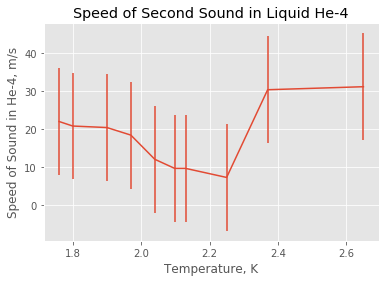

In [21]:
plt.errorbar(T, u, yerr=sigma_u)
plt.title('Speed of Second Sound in Liquid He-4')
plt.xlabel('Temperature, K')
plt.ylabel('Speed of Sound in He-4, m/s')